# Practico TP5 (Transformada de Fourier y procesamiento espectral)
El objetivo de este TP es implementar un aplicativo que permita la generación de la Transformada de Fourier (TF) directa e Inversa de Imágenes, este debe permitir:

* Cargar una imagen
* Generar la TF directa de la imagen y ver su espectro
* A partir del espectro generado mediante la TF inversa obtener la imagen
* Debe permitir guardar el espectro de amplitud de una imagen en un bitmap
* Debe permitir cargar el espectro de imagen a partir de un bitmap

Para esto se deben hacer pruebas con diferentes figuras geométricas (Cuadrados, rectángulos, círculos, elipses, rombos, dos o más objetos, etc.) (mostrar los espectros de mínimo 5 figuras diferentes).  
Adicionalmente con una imagen de su elección guardar el espectro de amplitud de la imagen en un bitmap, luego editarlo con un editor gráfico (por ejemplo, Paint), cargarlo al aplicativo y finalmente aplicar la transformada inversa (preservando la fase) para ver los efectos.  
*Nota:* se sugiere usar los widgets tipo botón para ejecutar las operaciones mencionadas y que el aplicativo interactivo tengas todas las funciones en el mismo entorno.
Por favor revisar cuidadosamente los videos de la teoría donde se explica cuidadosamente todas las características que se desea tenga el aplicativo.  
**Fecha de Entrega: 22 de octubre 2021**


### 1.1 Importar Librerías

In [1]:
import numpy as np
import imageio as io
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from skimage.transform import resize

### 1.2 Funciones Generales

In [2]:
# Descargar, leer, normalizar la imagen.
def get_and_read_img (url, name=''):
  img = io.imread(url)
  #img = np.clip(img/255.,0.,1.)
  #img = resize(img,(600,600))
  return img

# Mostrar Imagen
def show_img (img, size = (8,8)):
  plt.figure(figsize = size)
  plt.imshow(img,'gray')
  plt.show()

### 1.3 Funciones FFT - IFFT

In [54]:
def make_fft(image, offset):
  shape = image.shape
  if (len(shape) > 2): #aka rgb
    fft = np.fft.fftshift(np.fft.fft2(np.clip(image[:, :, 0] / 255., 0., 1.)))
  else:
    fft = np.fft.fftshift(np.fft.fft2(np.clip(image / 255., 0., 1.)))

  mag = np.uint8(np.floor(np.log(np.abs(fft)+ offset)))
  phase = np.angle(fft)
  return mag, phase

def make_ifft(mag, phase):
  image = (np.power(np.e, mag) - 1) * (np.cos(phase) + np.sin(phase) * 1j)
  return np.abs(np.fft.ifft2(np.fft.ifftshift(image)))

### 1.4 Visualización y guardado de los datos

In [34]:
def plot_fft(image,mag,phase):
  plt.set_cmap('gray')
  fig, ax = plt.subplots(1, 3, figsize=(25, 20))
  ax[0].imshow(image)
  ax[0].set_title('Imagen')
  ax[1].imshow(mag)
  ax[1].set_title('Magnitud')
  ax[2].imshow(phase)
  ax[2].set_title('Fase')
  plt.show()

def save_fft(mag,phase):
  scale = 255 / np.max(mag)
  io.imwrite('mag_fft.bmp', np.uint8(np.clip(mag * scale, 0., 255.)), 'bmp')
  io.imwrite('phase_fft.tif', phase, 'tif')
  return scale

def read_fft(path_mag,path_phase):
  mag = io.imread(path_mag, as_gray=True)
  phase = io.imread(path_phase)
  return mag, phase
  

In [27]:
!ls

mag_fft_1.bmp  mag_fft.bmp  phase_fft.tif  sample_data


### 1.4 Aplicativo para elegir formas a analizar con la FFT

<Figure size 432x288 with 0 Axes>

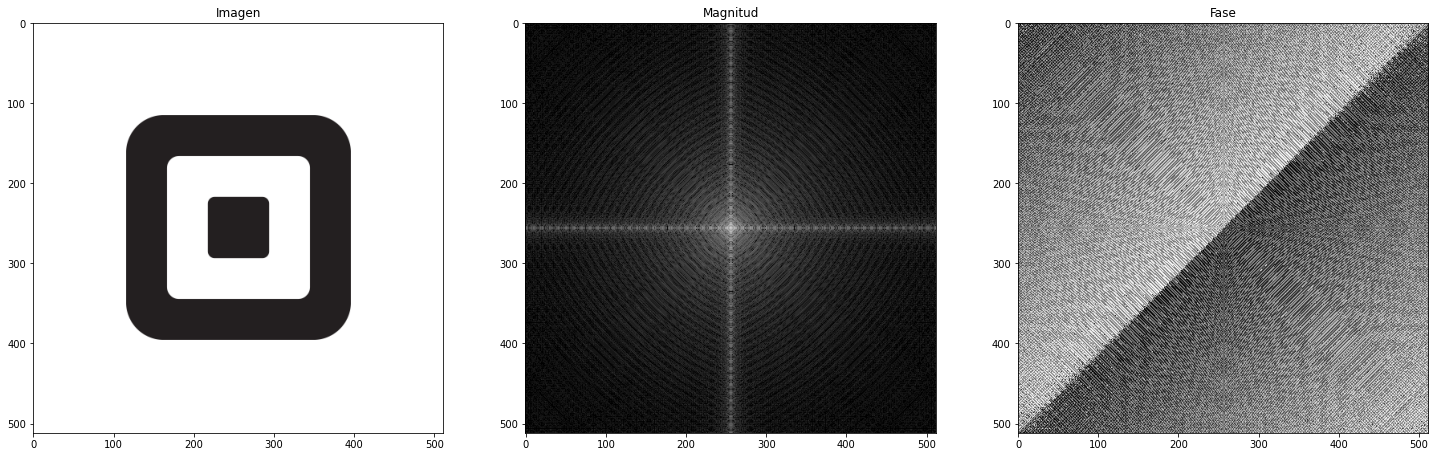

In [28]:
#@title Imágenes de Entrada (Formas): { run: "auto" }
dict_urls = {'Circulo':'https://cdn.webshopapp.com/shops/279921/files/331901296/image.jpg',
             'Cuadrado':'https://play-lh.googleusercontent.com/nHfzTLYYv-x74IAYGysewbjxI_gYij2Hp8z-OEch1lGiYtPlA3YmVtcg526YBvufaFs',
             'Triangulo':'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTgfxUQSNrUIpivN89eEzLjvZAPaarAzPXoycOc5rf4jNgVTJGiEWmO_b1s9rrfpHSq5zc&usqp=CAU',
             'Cuatro_Circulos':'https://img.flaticon.com/icons/png/512/37/37566.png?size=1200x630f&pad=10,10,10,10&ext=png&bg=FFFFFFFF',
             'Espiral':'https://ak.picdn.net/shutterstock/videos/1039432583/thumb/1.jpg'
            }

Imagen1 = 'Cuadrado' #@param ["Circulo","Cuadrado","Triangulo","Cuatro_Circulos","Espiral"]
image1 = get_and_read_img(dict_urls[Imagen1])

mag, phase = make_fft(image1,1.)

plot_fft(image1, mag, phase)

Podemos observar en el caso del cuadrado las componentes de frecuencia horizontal y vertical con valores altos. A su vez se tienen componentes de frecuencia diagonales que se van atenuando en las altas frecuencias, debido a que el cuadrado tiene dimensiones grandes con respecto a la imagen.

### 1.5 Imágenes a analizar con la FFT

<Figure size 432x288 with 0 Axes>

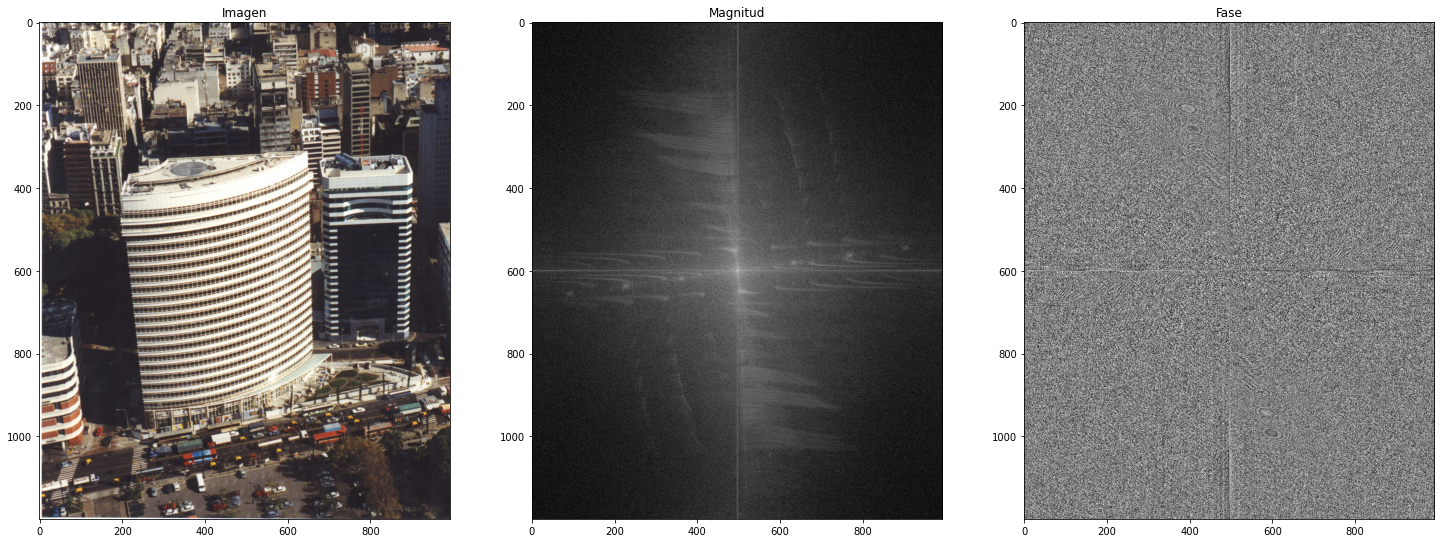

In [47]:
#@title Imágenes de Entrada: { run: "auto" }
dict_urls = {'Auto':'https://www.recambiooriginal.com/wp-content/uploads/2018/11/pintura_negra_coche_ventajas_inconvenientes_3-800x400.jpg',
             'Edificio':'https://s3-sa-east-1.amazonaws.com/modernabuenosaires/img/obras/galeria/888_1506021627.jpg',
             'Muralla':'https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/The_Great_Wall_of_China_at_Jinshanling-edit.jpg/1200px-The_Great_Wall_of_China_at_Jinshanling-edit.jpg',
             'Senor':'https://akvis.com/img/examples/retoucher/man-photoshop/source.jpg'
            }

Imagen1 = 'Edificio' #@param ["Auto","Edificio","Muralla","Senor"]
image1 = get_and_read_img(dict_urls[Imagen1])

mag, phase = make_fft(image1,1.)

plot_fft(image1, mag, phase)


### 1.6 Cambios en el resultado de la FFT y su impacto en la imagen original

In [48]:
scale = save_fft(mag,phase)

<Figure size 432x288 with 0 Axes>

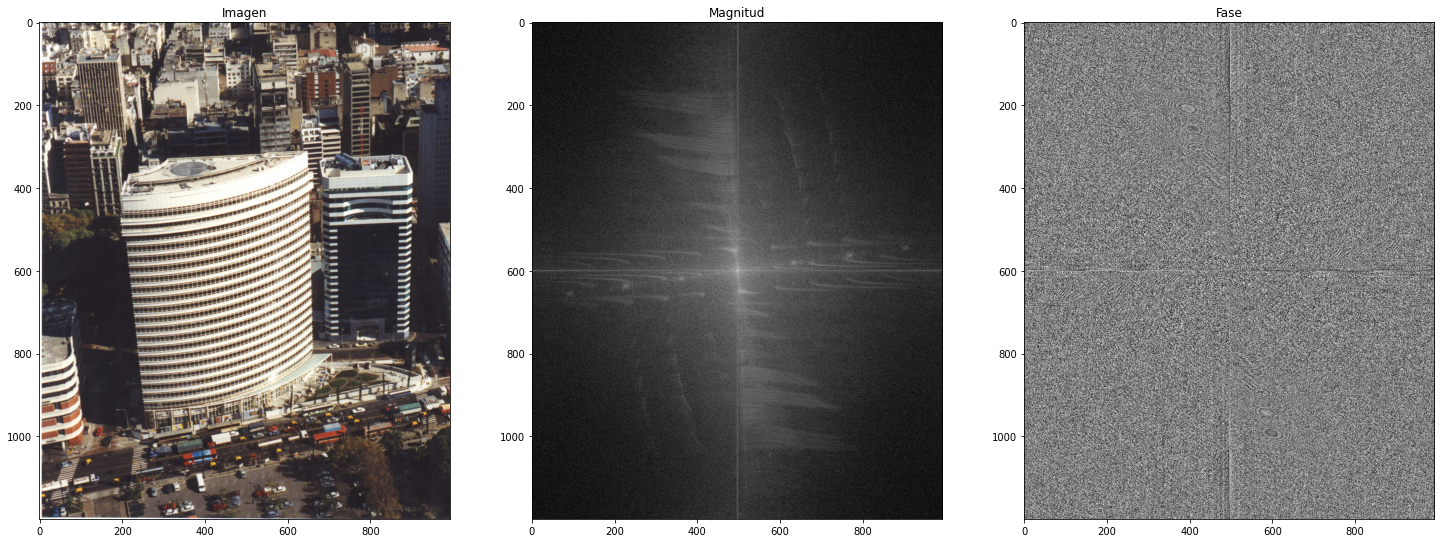

<Figure size 432x288 with 0 Axes>

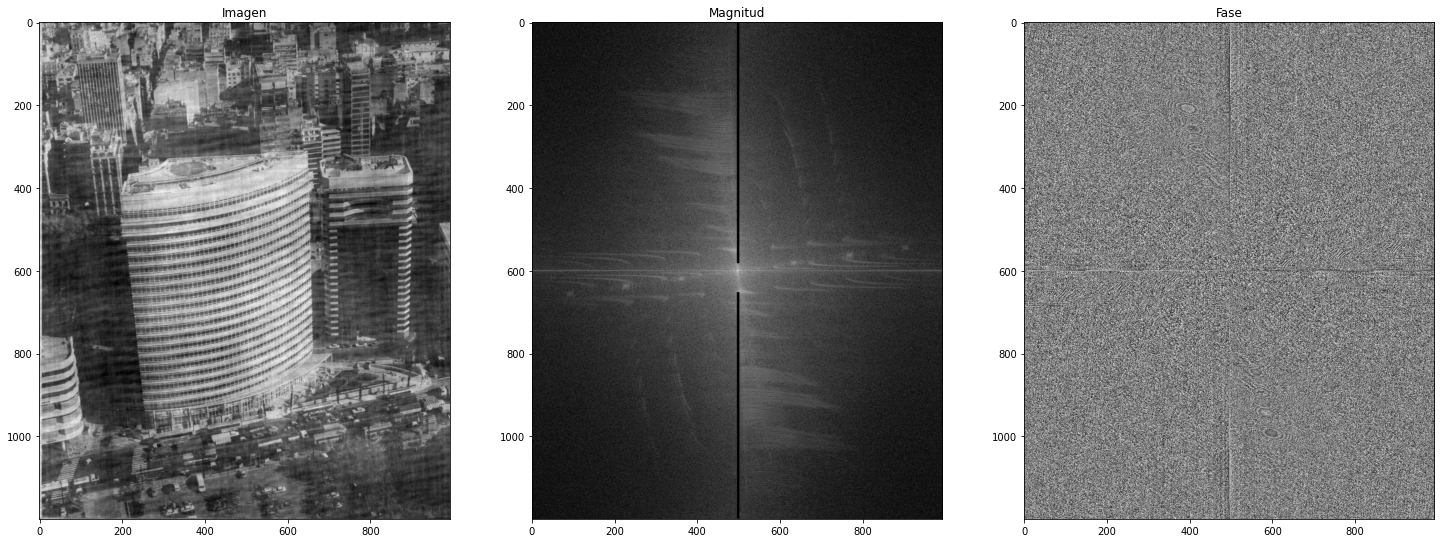

<Figure size 432x288 with 0 Axes>

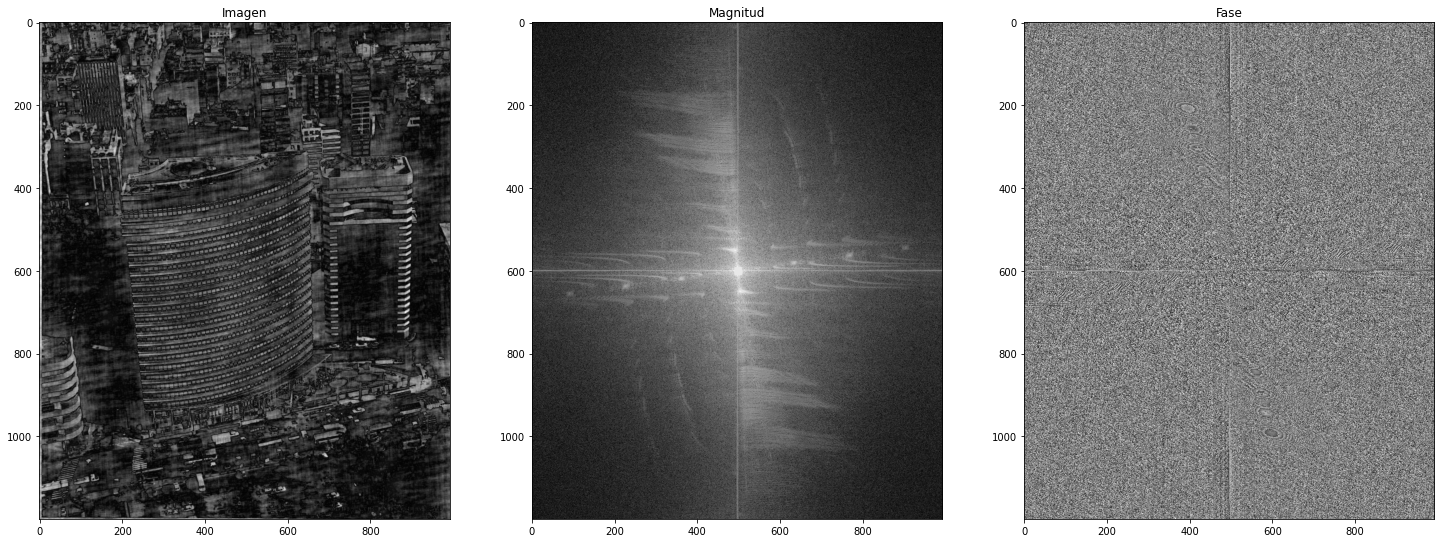

<Figure size 432x288 with 0 Axes>

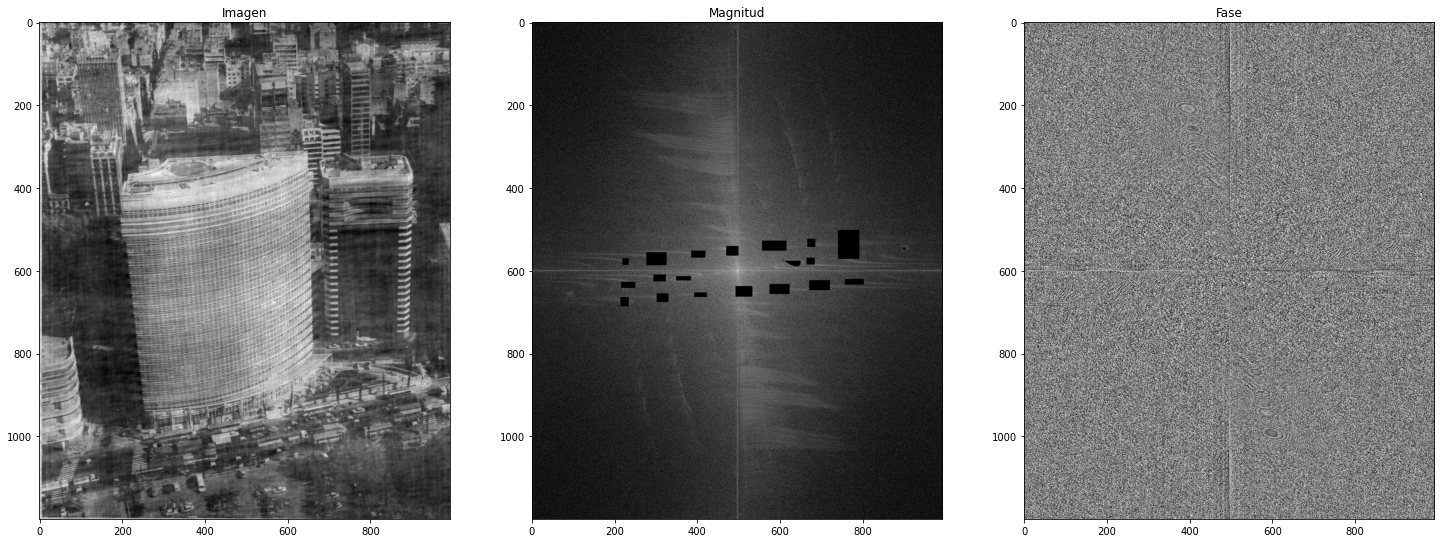

In [60]:
plot_fft(image1, mag, phase)
mag_new, phase_new = read_fft('mag_fft_1.bmp','phase_fft.tif')
img_new = make_ifft( mag_new / scale, phase_new )
plot_fft(img_new, mag_new, phase_new)
mag_new, phase_new = read_fft('mag_fft_2.bmp','phase_fft.tif')
img_new = make_ifft( mag_new / scale, phase_new )
plot_fft(img_new, mag_new, phase_new)
mag_new, phase_new = read_fft('mag_fft_3.bmp','phase_fft.tif')
img_new = make_ifft( mag_new / scale, phase_new )
plot_fft(img_new, mag_new, phase_new)

Se eligieron 3 casos particulares para probar el conocimiento sobre el concepto de la transformadda de Fourier en imágenes:
* En el primero, se oscureció  las líneas que corresponden a las frecuencias verticales, produciendo en la imagen un "lavado" de líneas horizontales visibles.
* En el segundo, se oscureció el centro de la fft (frecuencias bajas). Esto impacta directamente en el brillo general de la imagen.
* En el tercero, se oscurecieron componentes de frecuencias altas en las diagonales, que corresponden claramente al edificio blanco principal. Al oscurecer esto, las ventanas del mismo se dejan de ver.